In [61]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [62]:
df = pd.read_csv('trend_v1_.csv', encoding='utf-8')
training_set = pd.read_csv('training-set.csv', encoding='utf-8',
                           names=['FileID', 'Label'])
df_training = pd.merge(df, training_set, on=['FileID'], how='inner')
# Why does this not work? 
# dataset = pd.read_csv(r'C:\Users\David\Desktop\trend_v1_.csv', encoding='utf-8')

In [63]:
# Imputation of variables
total_time = 3600*24*90
df_training['QueryTsIntervalMean'].fillna(value=total_time, inplace=True)
df_training['QueryTsIntervalStd'].fillna(value=0, inplace=True) 
df_training.to_csv('trend_v2.csv', index=False)
feature = list(df_training)
#df_training.info()
#df_training.head()

In [64]:
#for i in range(len(feature)):
#    if isinstance(df_training.loc[0,feature[i]],(float)):
#        plt.figure()
#        plt.title(feature[i])
#        df_training[feature[i]].hist()
# Why does this not work?
#    if isinstance(df_training.loc[0,feature[i]],(int)):
#        plt.figure()
#        plt.title(feature[i])
#        df_training[feature[i]].hist()

In [65]:
# Data transformation
#from sklearn import preprocessing
#def normalize(x, axis, method, minmax_range =(0,1)):
#    if method == 'z-score':
#        scale_x = preprocessing.scale(x, axis=axis)
#    elif method == 'minmax':    
#        scale_x = preprocessing.minmax_scale(x, axis=axis, feature_range=minmax_range)
#    return scale_x
###
#axis = 0
#SalePrice_max = df_encode2['SalePrice'].max()
#SalePrice_min = df_encode2['SalePrice'].max()
#for i in feature:
#    if i in feature1:
#        df_encode2[i] = normalize(df_encode2[i], axis, method = 'minmax')
#df_encode2.info()
#df_encode2.head(10)

In [66]:
# Define X and y 
y = df_training['Label']
X = df_training.drop(['FileID','Label'],1)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, mean_absolute_error, r2_score
from xgboost import XGBClassifier
### http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [68]:
# XGBoost Classifier
# split our data into training & test
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=7, test_size=0.33)
eval_set = [(X_val, y_val)]
model_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, reg_alpha=0.1, reg_lambda=1)
model_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set, verbose=1)
# For auc, see https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
# model.predict will return the predicted label
y_pred = model_xgb.predict(X_val)
y_pred_proba = model_xgb.predict_proba(X_val)[:,1]
roc_auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('roc_auc: %.2f%%' % roc_auc)

[0]	validation_0-auc:0.786887
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.800745
[2]	validation_0-auc:0.827954
[3]	validation_0-auc:0.828618
[4]	validation_0-auc:0.837741
[5]	validation_0-auc:0.836152
[6]	validation_0-auc:0.839615
[7]	validation_0-auc:0.845303
[8]	validation_0-auc:0.847629
[9]	validation_0-auc:0.850149
[10]	validation_0-auc:0.849854
[11]	validation_0-auc:0.850383
[12]	validation_0-auc:0.851352
[13]	validation_0-auc:0.851613
[14]	validation_0-auc:0.854016
[15]	validation_0-auc:0.854219
[16]	validation_0-auc:0.85526
[17]	validation_0-auc:0.856081
[18]	validation_0-auc:0.855904
[19]	validation_0-auc:0.857427
[20]	validation_0-auc:0.859282
[21]	validation_0-auc:0.859457
[22]	validation_0-auc:0.861595
[23]	validation_0-auc:0.861695
[24]	validation_0-auc:0.861587
[25]	validation_0-auc:0.863847
[26]	validation_0-auc:0.864388
[27]	validation_0-auc:0.865087
[28]	validation_0-auc:0.865374
[29]	validation_0-auc:0.865873
[30]	validation_0

mae: 0.13%
r2: 0.35%
FPR: [ 0.          0.          0.         ...,  0.99961117  0.99987039  1.        ]
TPR: [  5.26315789e-04   2.68421053e-02   2.78947368e-02 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00]
thresholds: [  9.57362592e-01   8.65182161e-01   8.65055740e-01 ...,   8.53938225e-04
   8.34628008e-04   7.54229550e-04]


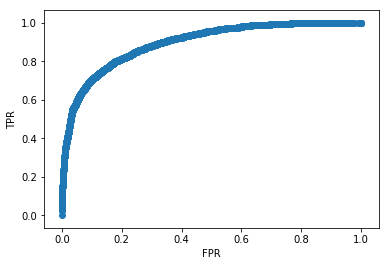

In [69]:
# Show the model statistics
mae = metrics.mean_absolute_error(y_val, y_pred_proba)
r2 = metrics.r2_score(y_val, y_pred_proba)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba, pos_label=1, drop_intermediate=True)
print('mae: %.2f%%' % mae)
print('r2: %.2f%%' % r2)
print('FPR:',fpr)
print('TPR:',tpr)
print('thresholds:',thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.scatter(fpr,tpr)
plt.show()

[ 0.06508876  0.0591716   0.08284023  0.11686391  0.          0.          0.
  0.02218935  0.          0.          0.          0.          0.07840237
  0.01331361  0.03254438  0.07988165  0.          0.01923077  0.
  0.00443787  0.00739645  0.          0.00295858  0.          0.02662722
  0.08431952  0.0147929   0.          0.03402367  0.          0.0147929   0.
  0.04733728  0.18491124  0.00295858  0.00591716]


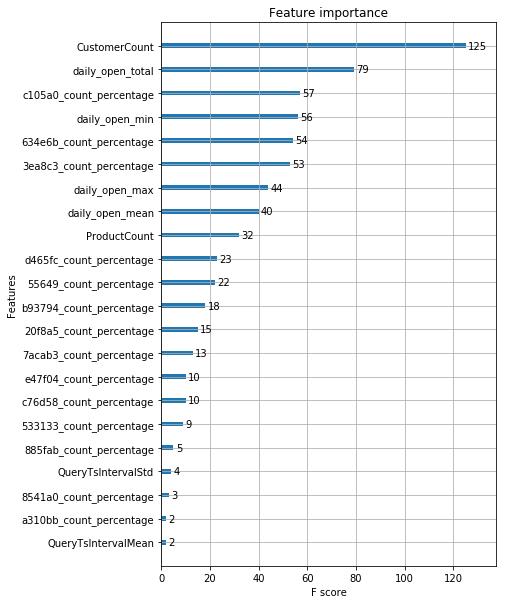

In [70]:
# Import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
print(model_xgb.feature_importances_)
rcParams['figure.figsize'] = 6,10
plot_importance(model_xgb, max_num_features=30)
plt.show()

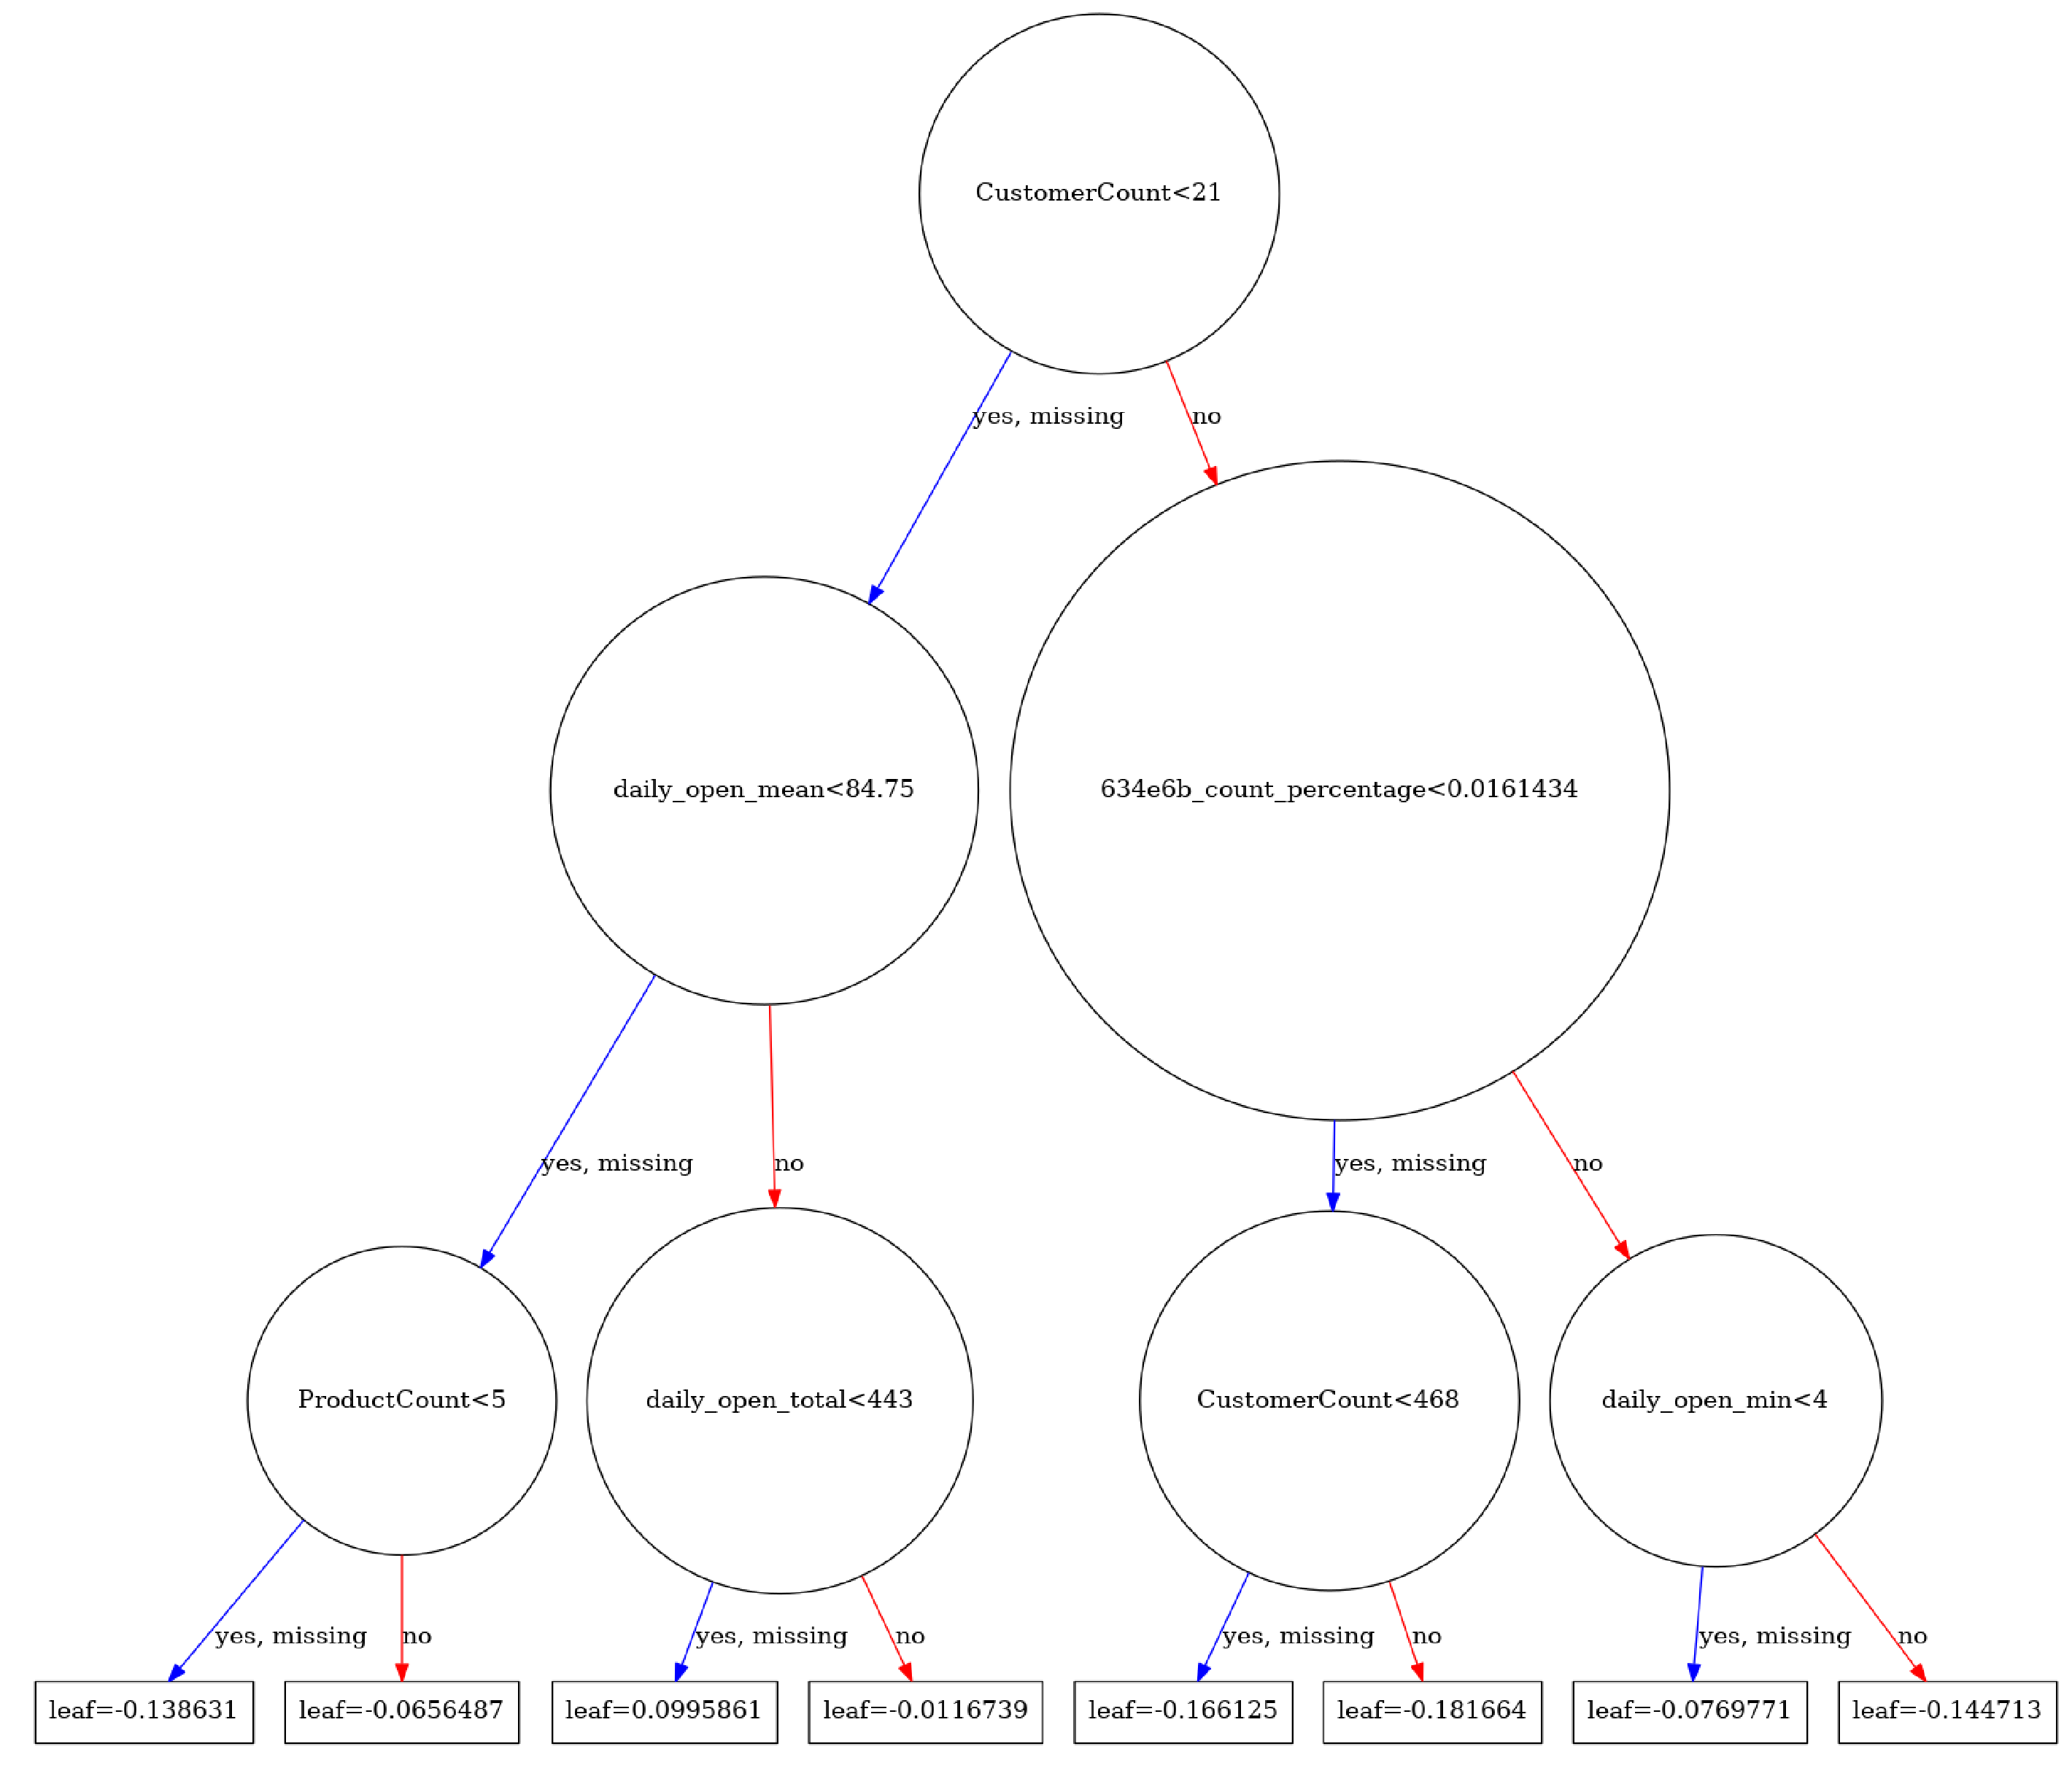

In [71]:
# Plot tree
from xgboost import plot_tree
rcParams['figure.figsize'] = 50,80
plot_tree(model_xgb, num_trees=1)
plt.show()

In [72]:
# Create submission
testing_set = pd.read_csv('testing-set.csv', encoding='utf-8', 
                          names=['FileID','Label'])
dft = pd.merge(df, testing_set, on=['FileID'], how='inner')
dft2 = dft.drop(['FileID','Label'],1)
# Create submission
y_predt = model_xgb.predict_proba(dft2)[:,1]
y_predt = pd.DataFrame(y_predt, columns=['Label'])
submission = pd.concat([pd.DataFrame(dft['FileID']), y_predt], axis=1)
submission.to_csv('trend_submission.csv', index=False, header=False)
#submission['Label].value_counts()

In [ ]:
# Grid Search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
parameters= {'max_depth':[3,4], 'learning_rate':[0.1], 
                'n_estimators':[100], 'reg_alpha':[0,0.1,1,10],
                'reg_lambda':[0,0.1,1,10]}
model = XGBClassifier()
best_model = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')
best_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set, verbose=1)

In [ ]:
# What are scores?
#print('score before Grid Search CV:%.4f'%model.score(X_test, y_test))
#print('score after Grid Search CV:%.4f'%best_model.score(X_test, y_test))
best_model.best_estimator_

In [ ]:
best_model.cv_results_

In [ ]:
# Imbalanced dataset
# http://contrib.scikit-learn.org/imbalanced-learn/stable/introduction.html#api-s-of-imbalanced-learn-samplers
# https://www.kaggle.com/saxinou/imbalanced-data-xgboost-tunning